In [18]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('house-buying/kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
corr = data.corr()
corr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


<AxesSubplot:>

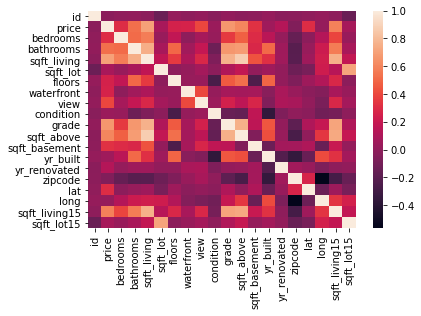

In [7]:
sb.heatmap(corr)

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

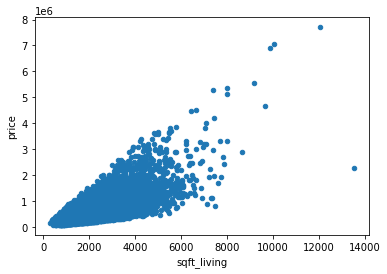

In [8]:
data.plot.scatter(x='sqft_living',y='price')

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

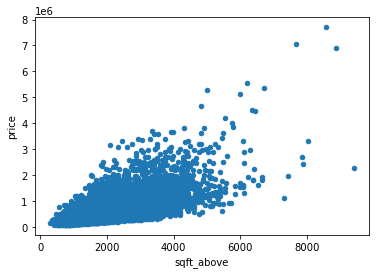

In [9]:
data.plot.scatter(x='sqft_above', y='price')

<AxesSubplot:xlabel='sqft_living15', ylabel='price'>

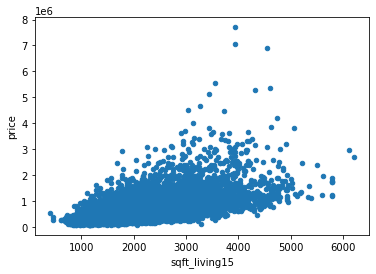

In [11]:
data.plot.scatter(x='sqft_living15', y='price')

In [29]:
x = data[['sqft_living', 'sqft_above', 'sqft_living15']].values
x

array([[1180, 1180, 1340],
       [2570, 2170, 1690],
       [ 770,  770, 2720],
       ...,
       [1020, 1020, 1020],
       [1600, 1600, 1410],
       [1020, 1020, 1020]])

In [30]:
y = data['price'].values
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [31]:
lr = LinearRegression()

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [33]:
x_train

array([[1400, 1400, 1440],
       [1540, 1540, 1540],
       [2980, 1710, 2240],
       ...,
       [4520, 3270, 3380],
       [ 860,  860, 1200],
       [1480, 1480, 1480]])

In [34]:
x_test

array([[2210, 2210, 1920],
       [1580, 1180, 1620],
       [2830, 2830, 2350],
       ...,
       [1370, 1080, 1560],
       [2590, 2590, 2850],
       [2980, 1800, 1920]])

In [35]:
y_train

array([ 320000.,  525000.,  352000., ..., 1250000.,  315000.,  650000.])

In [36]:
y_test

array([535000., 263000., 518000., ..., 446000., 695000., 450000.])

In [37]:
lr.fit(x_train, y_train)

LinearRegression()

In [38]:
y_pred = lr.predict(x_test)

In [39]:
y_pred

array([553065.161554  , 404117.06864372, 727113.35165919, ...,
       347191.88938363, 712174.69000041, 777749.41720018])

In [40]:
y_test

array([535000., 263000., 518000., ..., 446000., 695000., 450000.])

In [41]:
lr.score(x_train, y_train)

0.49965801028704315